Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2) For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Importing all the packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import geom
import math

In [3]:
data=pd.read_csv("aerofit_treadmill.csv")
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Checking the characteristics and structure of the dataset**

In [4]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
data.shape

(180, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [335]:
product_value_counts,gender_value_counts,ms_value_counts,fitness_value_counts=data['Product'].value_counts(),data['Gender'].value_counts(),data['MaritalStatus'].value_counts(),data['Fitness'].value_counts()
product_value_counts,gender_value_counts,ms_value_counts,fitness_value_counts,usage_value_counts

(KP281    80
 KP481    60
 KP781    40
 Name: Product, dtype: int64,
 Male      104
 Female     76
 Name: Gender, dtype: int64,
 Partnered    107
 Single        73
 Name: MaritalStatus, dtype: int64,
 3    97
 5    31
 2    26
 4    24
 1     2
 Name: Fitness, dtype: int64,
 3    69
 4    52
 2    33
 5    17
 6     7
 7     2
 Name: Usage, dtype: int64)

In [337]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**It is observed that data has no null values**

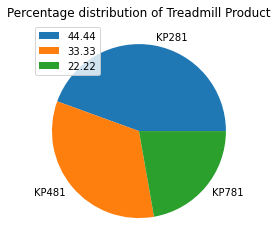

In [96]:
pie_data=round(data['Product'].value_counts()/data['Product'].count()*100,2)
plt.pie(x=pie_data,labels=data['Product'].unique())
plt.legend(pie_data,loc='upper left')
plt.title('Percentage distribution of Treadmill Product')
plt.show()

**In three types of treadmills available the base version which is KP281 has been sold more with 44% of total, thus followed by medium range product KP481 with 33% and high end product with 22%.**

**Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

In [60]:
data['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [62]:
age_mean=data['Age'].mean()
age_mean

28.788888888888888

In [63]:
import statistics as stat
age_median=stat.median(data['Age'])
age_median

26.0

**Average Age of the customers is 28.7 but this is contains outliers so, its best to consider median as the mean to know the average age which is 26.** 

In [67]:
age_25p=np.percentile(data['Age'],25)
age_50p=np.percentile(data['Age'],50)
age_75p=np.percentile(data['Age'],75)

In [66]:
age_50p

26.0

In [69]:
IQR_age=age_75p-age_25p
IQR_age

9.0

In [70]:
upper_whisker_age=age_75p + 1.5*IQR_age
lower_whisker_age=max(age_25p - 1.5*IQR_age,0)
lower_whisker_age,upper_whisker_age

(10.5, 46.5)

**Any age greater than 46.5 age and lower than 10.5 age is considered as outlier for the age group in the data**

In [71]:
age_outliers=data[data['Age']>upper_whisker_age]
age_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


<AxesSubplot:>

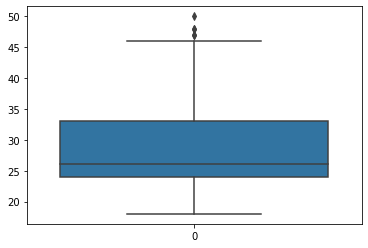

In [59]:
sns.boxplot(data=data['Age'])

**There are 5 outliers, because of this there is a increase in mean, its ideal to consider the median which is 50% percentile which gives correct mean age of the purchased people.**

In [74]:
len(age_outliers)

5

In [76]:
round(len(age_outliers)/data['Age'].shape[0]*100,2) # 2.78% of outliers in data

2.78

** 3) Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc) **

In [97]:
#Univariate analysis using countplot, histplot to determine the count of products purchased by categories

In [101]:
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

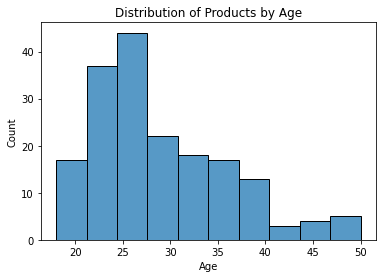

In [107]:
sns.histplot(data=data['Age'],bins=10) #Distribution of products by age
plt.title('Distribution of Products by Age')
plt.show()

**Most of the customers belong to age group of 22 to 28**

In [108]:
data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

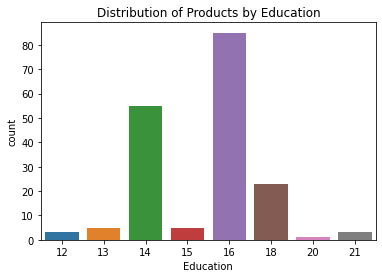

In [110]:
sns.countplot(data=data,x=data['Education'])
plt.title('Distribution of Products by Education')
plt.show()

**Most of the customers are graduates who are intrested in buying treadmill**

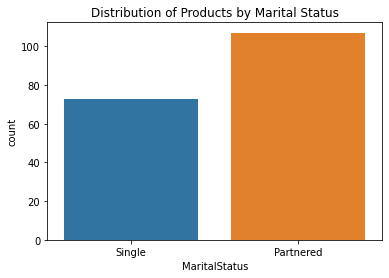

In [154]:
sns.countplot(data=data,x='MaritalStatus')
plt.title('Distribution of Products by Marital Status')
plt.show()

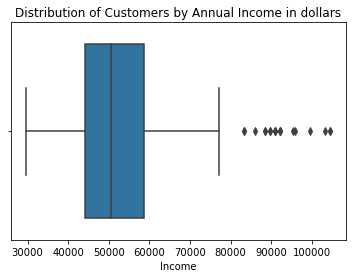

In [113]:
sns.boxplot(x=data['Income'])
plt.title('Distribution of Customers by Annual Income in dollars')
plt.show()

**The distribution of products is high among the middle class customers with Annual income of customers with range betweeen 45k dollars and 60K dollars**

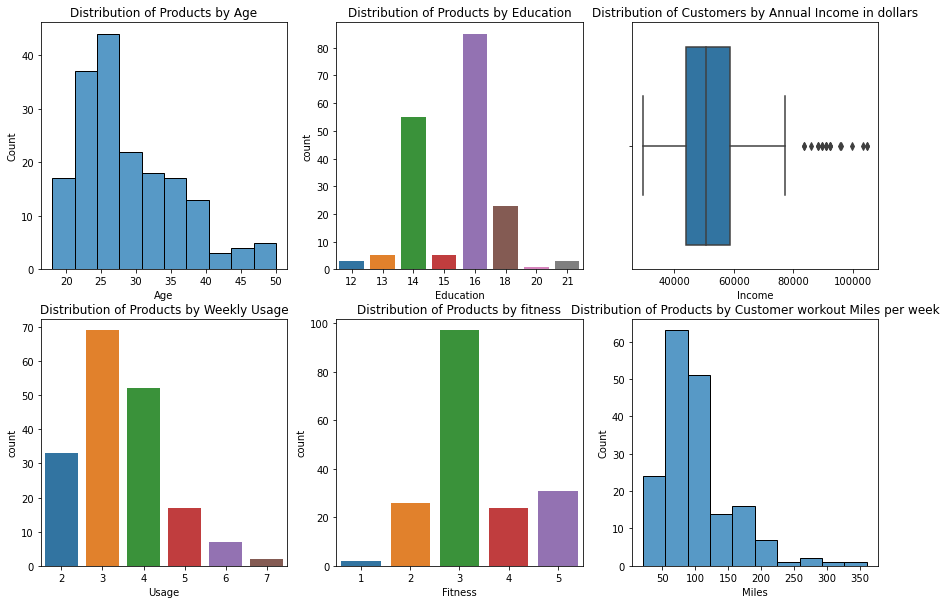

In [149]:
fig, ax=plt.subplots(2,3,figsize=(15,10))  #Distribution of products by age
sns.histplot(ax=ax[0,0],data=data['Age'],bins=10)
ax[0,0].set_title('Distribution of Products by Age')
#plt.title('Distribution of Products by Age',ax=ax[0,0])

sns.countplot(ax=ax[0,1],data=data,x=data['Education'])
ax[0,1].set_title('Distribution of Products by Education')


sns.boxplot(ax=ax[0,2],x=data['Income'])
ax[0,2].set_title('Distribution of Customers by Annual Income in dollars')

sns.countplot(ax=ax[1,0],data=data,x=data['Usage'])
ax[1,0].set_title('Distribution of Products by Weekly Usage')

sns.countplot(ax=ax[1,1],data=data,x=data['Fitness'])
ax[1,1].set_title('Distribution of Products by fitness')

sns.histplot(ax=ax[1,2],data=data['Miles'],bins=10)
ax[1,2].set_title('Distribution of Products by Customer workout Miles per week')
plt.show()

**People who are intermediate level in terms of fitness,usage are more interested in buying tredmill than the very active people as they want to start their fitness regime at home**

In [150]:
#Bivariate Analysis of different types of data variables

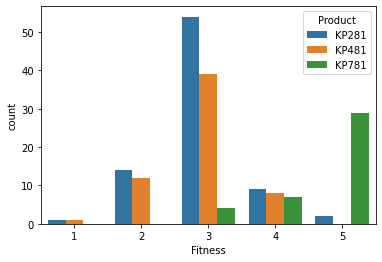

In [151]:
sns.countplot(data=data,x='Fitness',hue='Product')
plt.show()

**People with intermediate fitness and low in fitness are considering base verison of treadmill first i.e KP281 followed by KP481 and people with high fitness want the higher end product which is of high cost i.e KP781.**

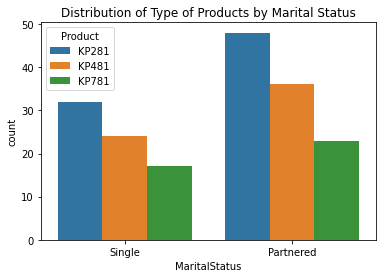

In [156]:
sns.countplot(data=data,x='MaritalStatus',hue='Product')
plt.title('Distribution of Type of Products by Marital Status')
plt.show()

**Looks like Partnered people holds the high distribution considering they have lot of responsibilities and less time to go out for run will prefer treadmill for home run**

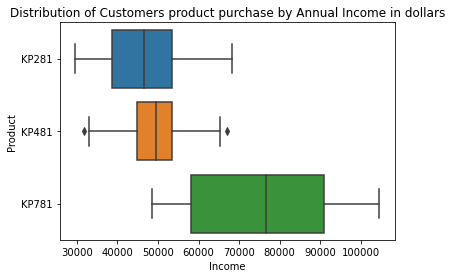

In [160]:
sns.boxplot(x=data['Income'],y=data['Product'])
plt.title('Distribution of Customers product purchase by Annual Income in dollars')
plt.show()

**Boxplot clearly shows based on the income levels, the customer bought the product. Product bought is directly proportional to the customer income.**

<AxesSubplot:xlabel='Age', ylabel='count'>

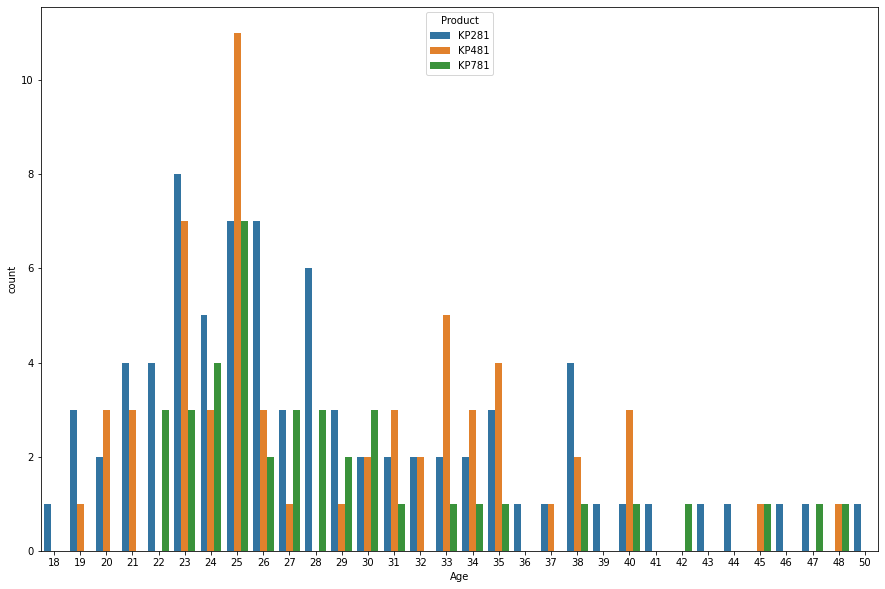

In [214]:
plt.figure(figsize=(15,10))
sns.countplot(data=data[['Age','Product']], x=data['Age'],hue='Product')
plt.title('Distribution of Products by Age')

**From the above count plot, we can assume that teenagers are strictly confined to base versions, where people who are financially independent are will to opt for the mid level and higher level treadmills i.e KP481 and KP781**

**Customers with age 25 bought medium product KP481 more than ever compared to other ages & products**

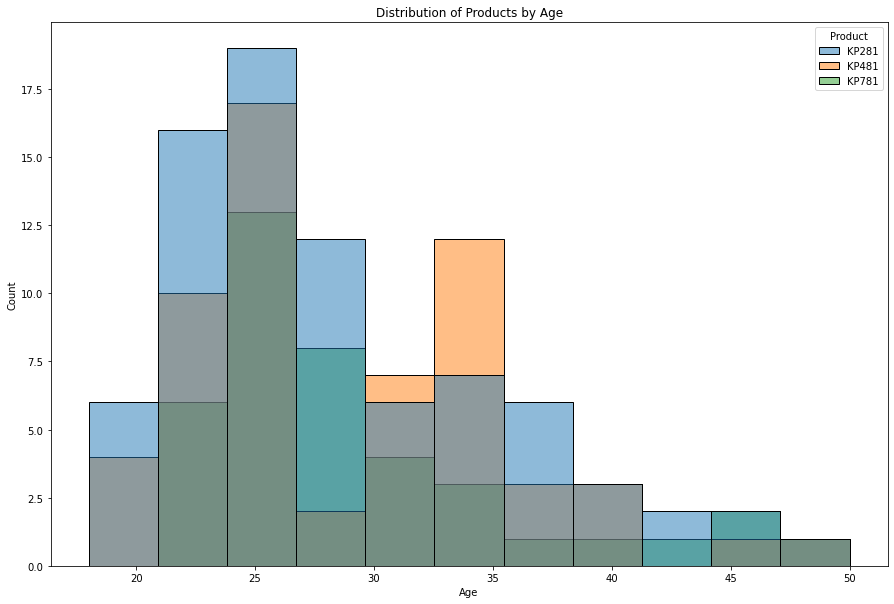

In [227]:
plt.figure(figsize=(15,10))
sns.histplot(data=data[['Age','Product']], x=data['Age'],hue='Product')
plt.title('Distribution of Products by Age')
plt.show()

In [ ]:
#Multivariate Analysis

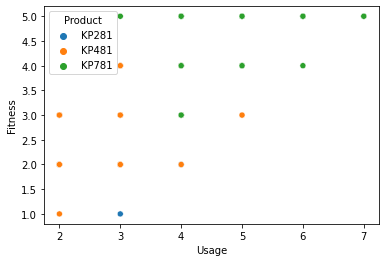

In [244]:
sns.scatterplot(data=data,x='Usage',y='Fitness',hue='Product')
plt.show()

**The above scatterplot clearly shows people with high fitness and high usage use the high end treadmill KP781**

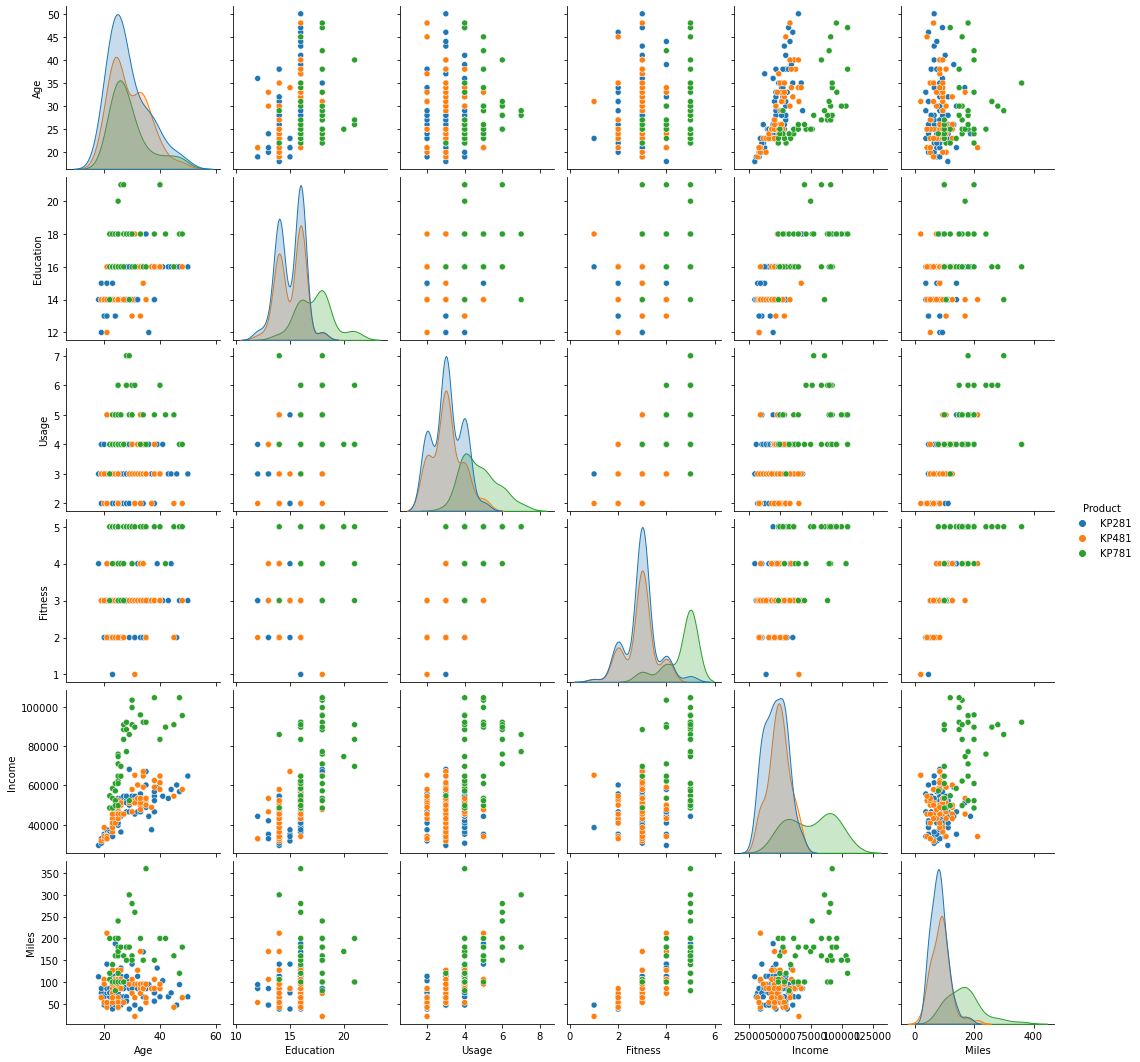

In [245]:
sns.pairplot(data=data,hue='Product')
plt.show()

In [246]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


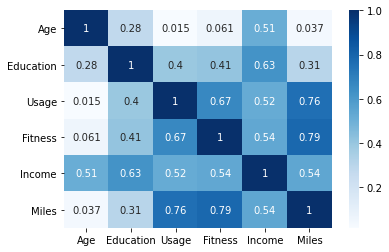

In [248]:
sns.heatmap(data=data.corr(),annot=True,cmap='Blues')
plt.show()

**Pairplots and heatmaps are the charts which are used to show corelation between all the variables present in the how two variables are giving insights of customers interests in choosing products**

**Mariginal & Conditional Probabilities through pandas corsstab normalize**

In [298]:
ct1=pd.crosstab(data['Gender'],data['Product'],margins=True,margins_name='Total')
ct1

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


In [301]:
pd.crosstab(data['Gender'],data['Product'],margins=True,normalize=1)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


In [302]:
pd.crosstab(data['Gender'],data['Product'],margins=True,normalize=0)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


**Marginal probability of a customer buying KP281,KP481,KP781 are 0.44,0.33,0.22 respectivly**

**Marginal probability of a male customer buying KP281,KP481,KP781 are 0.38,0.29,0.31 respectivly**

**Marginal probability of a female customer buying KP281,KP481,KP781 are 0.52,0.38,0.09 respectivly**

Here Customers are more willing to buy the base product based on their income,fitness levels i.e KP281 as it has more probability.

Among males and females, males are more interested to buy the higher end treadmill model KP781

**Conditional Probabilities of KP281,KP481,KP781 given that customer is female are 0.53,0.38,0.09 and customer is male are 0.28, 0.3, 0.32**

In [309]:
#Joint probabilty

In [310]:
ct1

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


In [323]:
KP281_and_Female_prob=round(ct1.iloc[0,0]/ct1.Total[2],2)
KP281_and_Female_prob

0.22

In [325]:
KP481_and_Female_prob=round(ct1.KP481[0]/ct1.Total[2],2)
KP481_and_Female_prob

0.16

In [326]:
KP781_and_Female_prob=round(ct1.KP781[0]/ct1.Total[2],2)
KP781_and_Female_prob

0.04

In [328]:
KP281_and_male_prob=round(ct1.iloc[0,0]/ct1.Total[2],2)
KP281_and_male_prob

0.22

In [329]:
KP481_and_male_prob=round(ct1.KP481[1]/ct1.Total[2],2)
KP481_and_male_prob

0.17

In [330]:
KP781_and_male_prob=round(ct1.KP781[1]/ct1.Total[2],2)
KP781_and_male_prob

0.18

**Joint probabilities of customer being the female wrt the product being KP281,KP481,KP781 are 0.22,0.16,0.04**

**Joint probabilities of customer being the male wrt the product being KP281,KP481,KP781 are 0.22,0.17,0.18**

In [331]:
#Conditional Probabilities

In [333]:
prob_KP281_given_Female=round(ct1.iloc[0,0]/ct1.Total[0],2)
print(prob_KP281_given_Female)
prob_KP481_given_Female=round(ct1.KP481[0]/ct1.Total[0],2)
print(prob_KP481_given_Female)
prob_KP781_given_Female=round(ct1.KP781[0]/ct1.Total[0],2)
print(prob_KP781_given_Female)

0.53
0.38
0.09


In [334]:
prob_KP281_given_male=round(ct1.iloc[0,1]/ct1.Total[1],2)
print(prob_KP281_given_male)
prob_KP481_given_male=round(ct1.KP481[1]/ct1.Total[1],2)
print(prob_KP481_given_male)
prob_KP781_given_male=round(ct1.KP781[1]/ct1.Total[1],2)
print(prob_KP781_given_male)

0.28
0.3
0.32


# Summary of Business Insights based on Analysis

It is observed that data has no null values

In three types of treadmills available the base version which is KP281 has been sold more with 44% of total, thus followed by medium range product KP481 with 33% and high end product with 22%.

Average Age of the customers is 28.7 but this is contains outliers so, its best to consider median as the mean to know the average age which is 26.

There are 5 outliers, because of this there is a increase in mean, its ideal to consider the median which is 50% percentile which gives correct mean age of the purchased people.

Most of the customers belong to age group of 22 to 28.

Most of the customers are graduates who are intrested in buying treadmill.

The distribution of products is high among the middle class customers with Annual income of customers with range betweeen 45k dollars and 60K dollars.

People who are intermediate level in terms of fitness,usage are more interested in buying tredmill than the very active people as they want to start their fitness regime at home.

People with intermediate fitness and low in fitness are considering base verison of treadmill first i.e KP281 followed by KP481 and people with high fitness want the higher end product which is of high cost i.e KP781.

Looks like Partnered people holds the high distribution considering they have lot of responsibilities and less time to go out for run will prefer treadmill for home run.

Boxplot clearly shows based on the income levels, the customer bought the product. Product bought is directly proportional to the customer income.

From the count plot, we can assume that teenagers are strictly confined to base versions, where people who are financially independent are will to opt for the mid level and higher level treadmills i.e KP481 and KP781

Customers with age 25 bought medium product KP481 more than ever compared to other ages & products.

The scatterplot b/w fitness,usage,products clearly shows people with high fitness and high usage use the high end treadmill KP781.

Pairplots and heatmaps are the charts which are used to show corelation between all the variables present in the how two variables are giving insights of customers interests in choosing products.

Marginal probability of a customer buying KP281,KP481,KP781 are 0.44,0.33,0.22 respectivly

Marginal probability of a male customer buying KP281,KP481,KP781 are 0.38,0.29,0.31 respectivly

Marginal probability of a female customer buying KP281,KP481,KP781 are 0.52,0.38,0.09 respectivly

Customers are more willing to buy the base product based on their income,fitness levels i.e KP281 as it has more probability.

Among males and females, males are more interested to buy the higher end treadmill model KP781.

Conditional Probabilities of KP281,KP481,KP781 given that customer is female are 0.53,0.38,0.09 and customer is male are 0.28, 0.3, 0.32.

Joint probabilities of customer being the female wrt the product being KP281,KP481,KP781 are 0.22,0.16,0.04.

Joint probabilities of customer being the male wrt the product being KP281,KP481,KP781 are 0.22,0.17,0.18.

# Recommendations

1) From the data it is visible that most of customers are not shy to invest on their health priorities by buying treadmill based on their fitness and usage. Aerofit should give training and show the analysis to sales people for pitching the product based on their fitness levels,usage and income.

2) We can see that medium range product KP481 is highly preferred among median age groups and customers with intermediate fitness. So, Aerofit could think of some offers on high end products and tempt this section of customers to opt for KP781.

3) We can see that females are more interested in the base versions, I would suggest Aerofit to conduct women fitness campaigns and offer goodies or provide discount for the high end products.

4) Aerofit can implement the trade in feature of old product for the old customers and offer discount in new products. These feature will give hope for the customer to return in future.

5) Aerofit should concentrate Marketing products on different streams such as TV, youtube,newspapers where we can spread the word which will help the families to buy product as the treadmill can be used by whole family which is why customers will be more interested in it. 